# Youtube comments analysis

<a id="0"></a> <br>
__Table of Contents__
1. [Prepare Data for Analysis](#1)
2. [Sentiment Analysis of the Users' Comments](#2)
3. [Wordcolud Analysis](#3)
4. [Youtube video trending tag analysis](#4)
5. [Corelation between Like (Dislikes) and Number of Views](#5)
6. [Youtube Comments Emoji Analysis](#6)
7. [Category Popularity of Youtube Videos](#7)
8. [User Engagement in Youtube Videos](#8)
9. [Youtube Channel Popularity](#9)


<a id="1"></a>
## 1. Prepare Data for Analysis

__Data Source:__

* https://www.kaggle.com/datasets/datasnaek/youtube?select=UScomments.csv
* https://www.kaggle.com/datasets/datasnaek/youtube?select=USvideos.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
youtube_comments = pd.read_csv('data/UScomments.csv', error_bad_lines=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_6940\4292084031.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  youtube_comments = pd.read_csv('data/UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\USER\AppData\Local\Temp\ipykernel_6940\4292084031.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  youtube_comments = pd.read_csv('data/UScomments.csv', error_bad_lines=False)


In [3]:
youtube_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


__how many missing values exist in our data?__

In [4]:
youtube_comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

__drop the missing values__

In [5]:
youtube_comments.dropna(inplace=True)
youtube_comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

<a id="2"> </a>
## 2. Sentiment Analysis of the Users' Comments

In [6]:
from textblob import TextBlob

In [7]:
def generate_polarity(row):
    try:
        polarity = TextBlob(row['comment_text']).sentiment.polarity 
    except:
        polarity = 0
    
    return polarity
            

In [8]:
youtube_comments['polarity'] = youtube_comments.apply(generate_polarity, axis=1)

In [9]:
youtube_comments['polarity'].head(20)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.800000
9    -0.135714
10    0.000000
11    0.200000
12   -0.023333
13    0.500000
14    0.000000
15    0.800000
16   -0.291667
17    0.000000
18    0.250000
19   -0.800000
Name: polarity, dtype: float64

<a id="3"> </a>
## 3. Wordcolud Analysis

In [10]:
from wordcloud import WordCloud, STOPWORDS
import re

In [11]:
positive_comments = youtube_comments[youtube_comments['polarity'] == 1]
negative_comments = youtube_comments[youtube_comments['polarity'] == -1]

In [12]:
all_pos_comments = ' '.join(positive_comments['comment_text'])
all_neg_comments = ' '.join(negative_comments['comment_text'])

In [13]:
all_pos_comments[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

In [14]:
# Remove spaces and special characters using regular expressions in python
all_pos_comments = re.sub('[^a-zA-Z]', ' ', all_pos_comments)
all_pos_comments[0:100]

all_neg_comments = re.sub('[^a-zA-Z]', ' ', all_neg_comments)
all_neg_comments[0:100]

'BEN CARSON IS THE MAN      THEY HATE HIM CAUSE HE EXPOSED HITLARY S RITUAL ABUSE ON CHILDREN        '

In [15]:
# Remove double and more spaced form the all comments
all_pos_comments = re.sub(' +', ' ', all_pos_comments)
all_pos_comments[0:100]

all_neg_comments = re.sub(' +', ' ', all_neg_comments)
all_neg_comments[0:100]

'BEN CARSON IS THE MAN THEY HATE HIM CAUSE HE EXPOSED HITLARY S RITUAL ABUSE ON CHILDREN Well The bra'

__Wordcloud for Positive Comments__

(-0.5, 399.5, 199.5, -0.5)

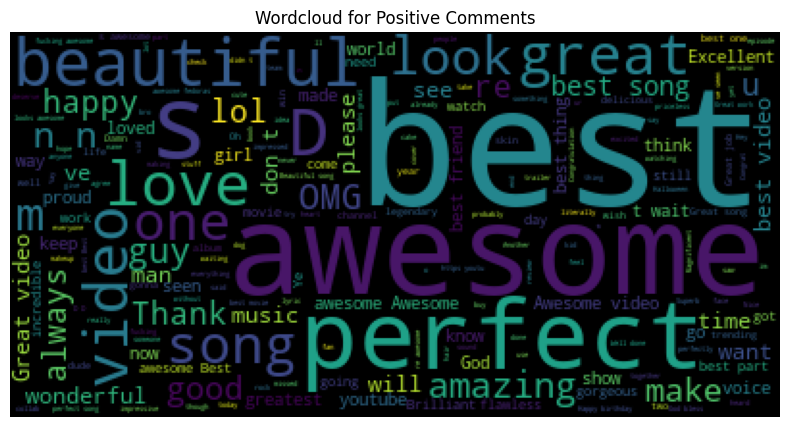

In [16]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(all_pos_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title('Wordcloud for Positive Comments')
plt.axis('off')

__Wordcloud for Negative Comments__

(-0.5, 399.5, 199.5, -0.5)

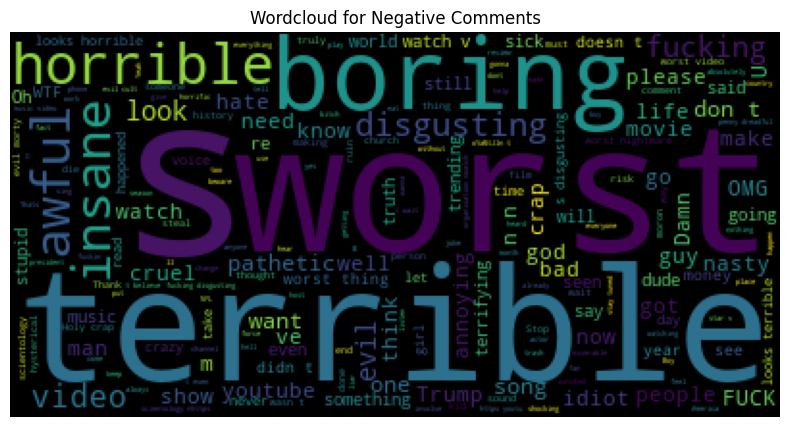

In [17]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(all_neg_comments)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)
plt.title('Wordcloud for Negative Comments')
plt.axis('off')

<a id="4"> </a>
## 4. Youtube video trending tag analysis

In [18]:
youtube_videos = pd.read_csv('data/USvideos.csv', error_bad_lines=False)
youtube_videos.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_6940\1661806831.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  youtube_videos = pd.read_csv('data/USvideos.csv', error_bad_lines=False)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [19]:
all_tags = ' '.join(youtube_videos['tags'])
youtube_videos['tags'].iloc[1]

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

__Remove Special Characters and additional spaces from tags__

In [20]:
all_tags = re.sub('[^a-zA-Z]', ' ', all_tags)
all_tags = re.sub(' +', ' ', all_tags)
all_tags[:200]

'SHANtell martin last week tonight trump presidency last week tonight donald trump john oliver trump donald trump racist superman rudy mancuso king bach racist superman love rudy mancuso poo bear black'

__Wordcloud Analysis of the Tags__

(-0.5, 999.5, 499.5, -0.5)

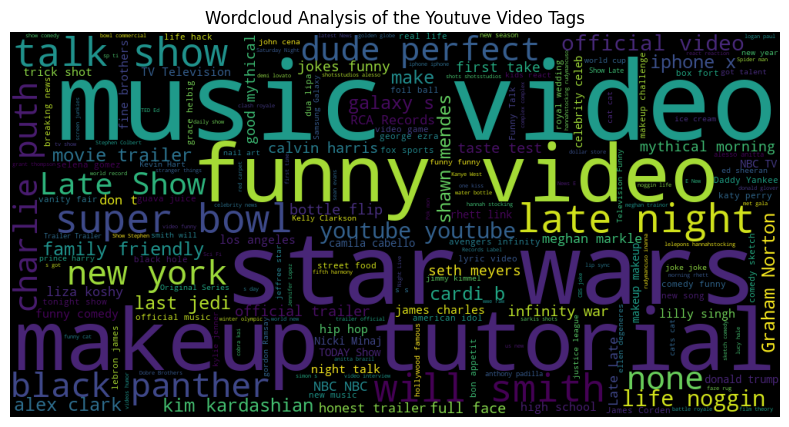

In [21]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(all_tags)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)
plt.title('Wordcloud Analysis of the Youtuve Video Tags')
plt.axis('off')

<a id="5"></a>
## 5. Corelation between Like (Dislikes) and Number of Views

Text(0.5, 1.0, 'Regression plot for likes vs views')

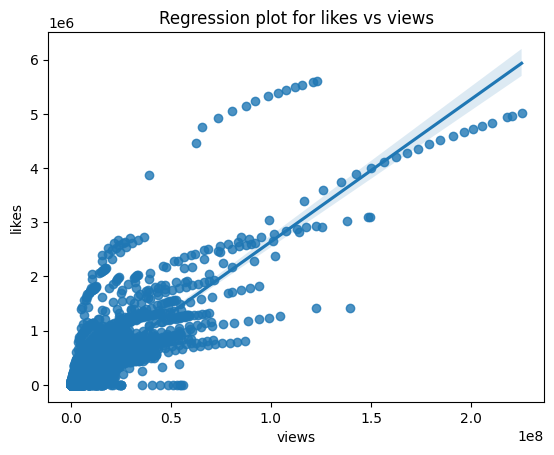

In [22]:
sns.regplot(data=youtube_videos, x='views', y='likes')
plt.title('Regression plot for likes vs views')

Text(0.5, 1.0, 'Regression plot for dislikes vs views')

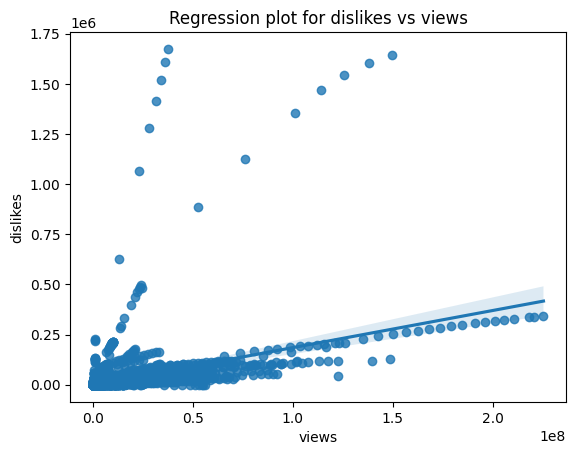

In [23]:
sns.regplot(data=youtube_videos, x='views', y='dislikes')
plt.title('Regression plot for dislikes vs views')

__Heatmap Diagram of Correlation between Views, Likes and Dislikes__

<AxesSubplot: >

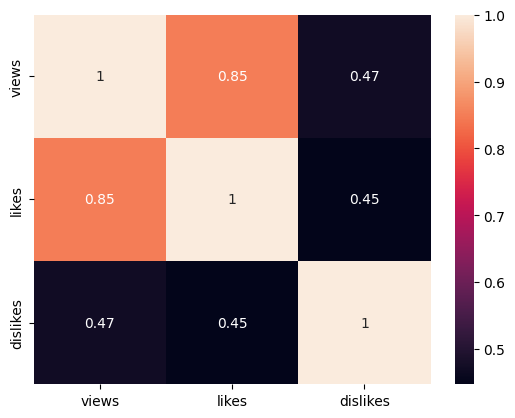

In [24]:
df = youtube_videos[['views', 'likes', 'dislikes']]
sns.heatmap(df.corr(), annot=True)

<a id="6"></a>
## 6. Youtube Comments Emoji Analysis

In [25]:
import emoji

In [26]:
emoji_list=[]
for comment in youtube_comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

C:\Users\USER\AppData\Local\Temp\ipykernel_6940\229485040.py:4: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if char in emoji.UNICODE_EMOJI_ENGLISH:


In [27]:
len(emoji_list), emoji_list[:20]

(294549,
 ['‼',
  '‼',
  '‼',
  '😉',
  '😭',
  '👍',
  '🏻',
  '❤',
  '😍',
  '💋',
  '💙',
  '👍',
  '👈',
  '😂',
  '🔥',
  '😂',
  '😂',
  '😂',
  '😂',
  '👻'])

__Find the most common used emojis__

In [28]:
from collections import Counter
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [29]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [30]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [31]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [32]:
trace = go.Bar(x=emojis, y=freqs)
iplot([trace])

<a id="7"></a>
## 7. Category Popularity of Youtube Videos

__Read Category File(JSON Format)__

In [33]:
category_json = pd.read_json('data/US_category_id.json')

In [34]:
category_id = []
category_title = []
for i in range(len(category_json)):
    category_id.append(category_json['items'].iloc[i].get('id')) 
    category_title.append(category_json['items'].iloc[i].get('snippet').get('title'))


In [35]:
category_df = pd.DataFrame(list(zip(category_id, category_title)), columns=['category_id', 'category_title'])
category_df.set_index('category_id', inplace=True)
category_df.index = category_df.index.astype('int64')

In [36]:
category_dict = category_df.to_dict()

In [37]:
youtube_videos['category_title'] = youtube_videos['category_id'].map(category_dict['category_title'])

In [38]:
youtube_videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_title'],
      dtype='object')

In [39]:
youtube_videos['category_title']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_title, Length: 40949, dtype: object

In [40]:
type(youtube_videos['category_id'].iloc[0])

numpy.int64

__Plot the results__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Science & Technology'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'News & Politics'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Howto & Style'),
  Text(11, 0, 'Autos & Vehicles'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows')])

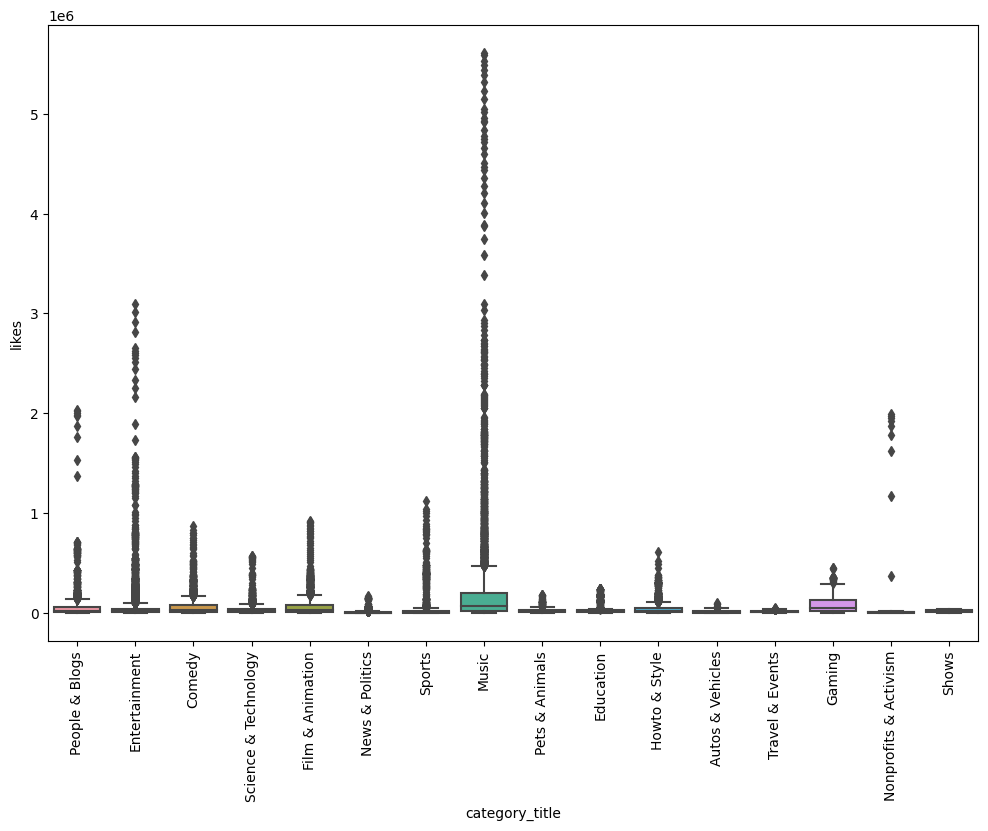

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_title',y='likes',data=youtube_videos)
plt.xticks(rotation='vertical')

<a id="8"></a>
## 8. User Engagement in Youtube Videos

In [42]:
youtube_videos['like_rate']=(youtube_videos['likes']/youtube_videos['views'])*100
youtube_videos['dislike_rate']=(youtube_videos['dislikes']/youtube_videos['views'])*100
youtube_videos['comment_count_rate']=(youtube_videos['comment_count']/youtube_videos['views'])*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Science & Technology'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'News & Politics'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Howto & Style'),
  Text(11, 0, 'Autos & Vehicles'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows')])

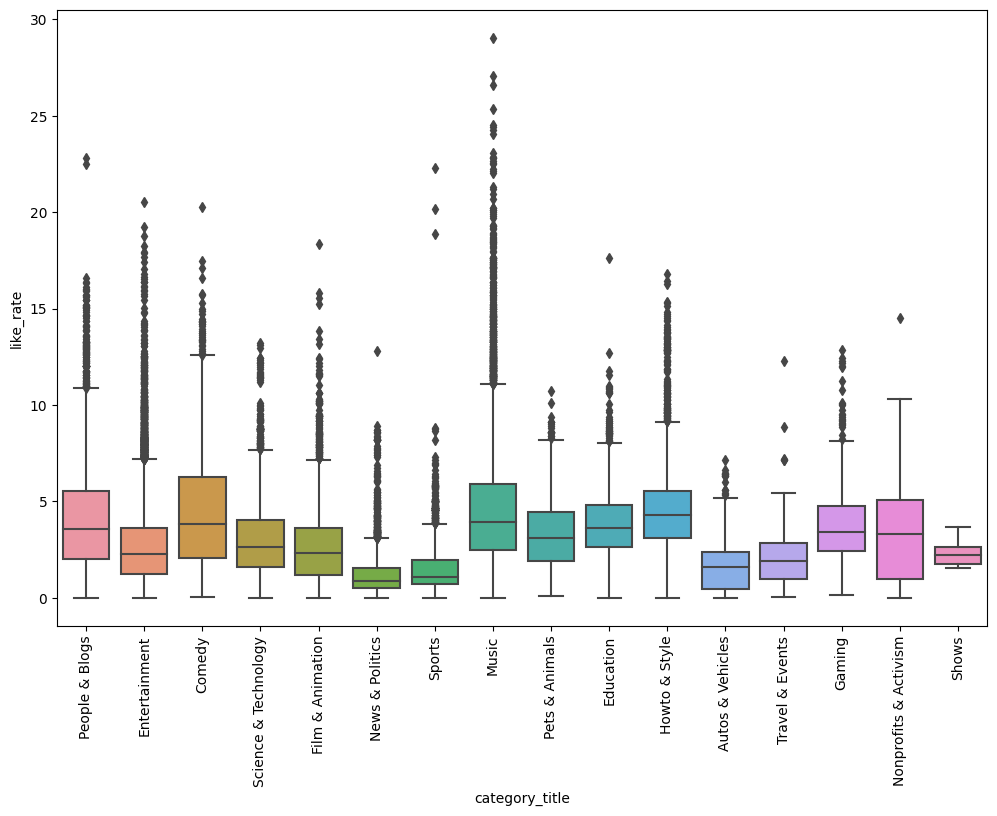

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_title',y='like_rate',data=youtube_videos)
plt.xticks(rotation='vertical')

<AxesSubplot: xlabel='views', ylabel='likes'>

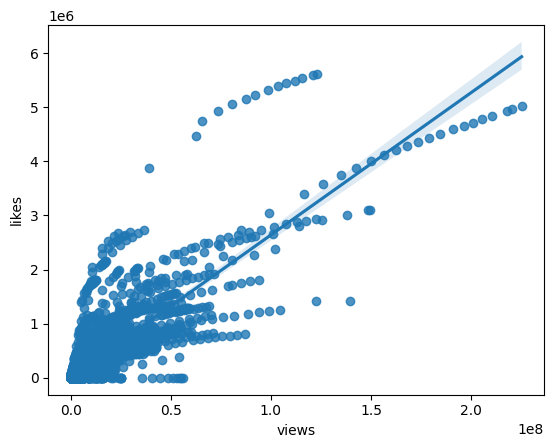

In [44]:
sns.regplot(data=youtube_videos,x='views',y='likes')

<AxesSubplot: >

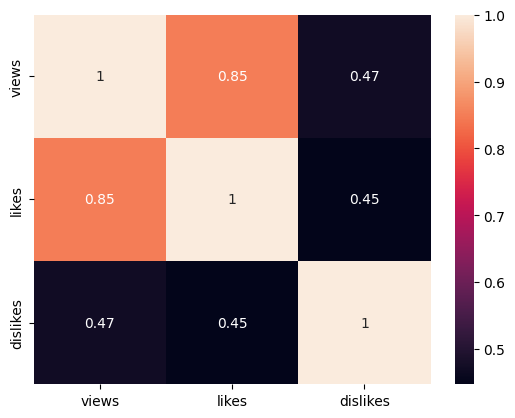

In [45]:
sns.heatmap(youtube_videos[['views', 'likes', 'dislikes']].corr(),annot=True)

<a id="9"></a>
## 9. Youtube Channel Popularity

In [46]:
youtube_channel_df = youtube_videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
youtube_channel_df

,channel_title,total_videos
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Vox,193
3,Netflix,193
4,TheEllenShow,193
...,...,...
2202,Taylor Alexander,1
2203,Humble Design,1
2204,Tamar Chronicles,1
2205,BTS Videos,1


In [47]:
import plotly.express as px

In [48]:
px.bar(data_frame=youtube_channel_df[0:20],x='channel_title',y='total_videos')